##### Artifical Neural Network

In [59]:
# Imports
%matplotlib inline
import pandas as pd
import numpy as np
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, RidgeCV, LassoCV, ElasticNetCV
from sklearn.metrics import mean_squared_error, make_scorer
from scipy.stats import skew
from IPython.display import display
import matplotlib.pyplot as plt
import seaborn as sns

In [60]:
# Definitions
pd.set_option('display.float_format', lambda x: '%.3f' % x)

#njobs = 4

In [61]:
plt.style.use('ggplot')

In [6]:
%cd Desktop/

/Users/jimdoone/Desktop


In [3]:
%ls

Desktop/
Desktop_Data/
Icon?
Jobs/
PVPMC/
Python/
SCREEN_SHOTS/
choosing_colors.pdf
jamesbond.csv
kc_house_data.csv*
machine/
pandas_data_files/
test.csv
train.csv
~$E POSITION .docx
~$EDExercise 1 Simple Project Finance Model.xlsm
~$Excel2013StatisticsChapter07.xlsm
~$Fred_2013.xlam
~$HCA.xlsx
~$P90, P99 etc Analysis.xlsx
~$Python.docx
~$Read PDF to Excel.xlsm
~$Risk_2.xlsx
~$Solar Model Version 3.xlsm
~$anddo_Excel_notes.docx
~$ats_notes.docx
~$ergy Primer.docx
~$mes_Doone_Alcen_CL.docx
~$mes_Doone_Tesla.docx
~$n_Leffern__Mark_20150227 (1).docx
~$oone_CSE_CL.docx
~$oone_Duq.docx
~$rect Current Transmission Lines.docx


In [62]:
df = pd.read_csv('train.csv')
df.head(2)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.000,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.000,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500


##### Shape

In [63]:
print(f'df.csv shape is {df.shape}')

df.csv shape is (1460, 81)


##### Duplicates

In [64]:
#df.Id 
idsUnique = len(set(df.Id))
idsTotal = df.shape[0]
idsDupli = idsTotal - idsUnique
print(f"There are {idsDupli} duplicate IDS for {idsTotal} total entries")

There are 0 duplicate IDS for 1460 total entries


##### Drop Id

In [65]:
df.drop('Id', axis =1, inplace= True)

##### Preprocessing
##### Outliers

In [66]:
df.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'Wo

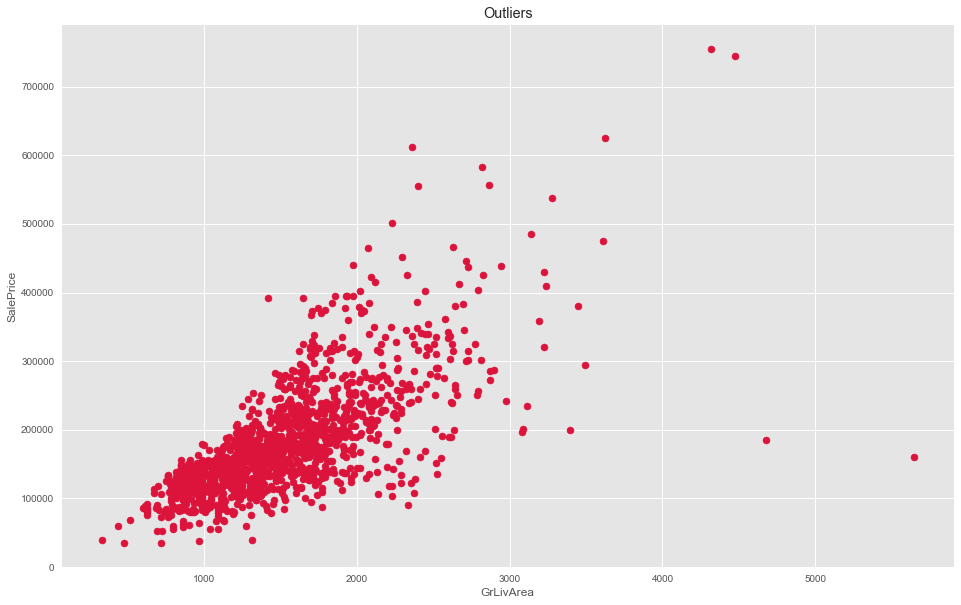

In [67]:
plt.figure(figsize=(16,10))
plt.scatter(df['GrLivArea'], df['SalePrice'], c='crimson')
plt.title('Outliers')
plt.xlabel("GrLivArea")
plt.ylabel("SalePrice")
plt.show()

In [68]:
df = df[df['GrLivArea'] < 4000]
df = df[df['GrLivArea'] > 630]

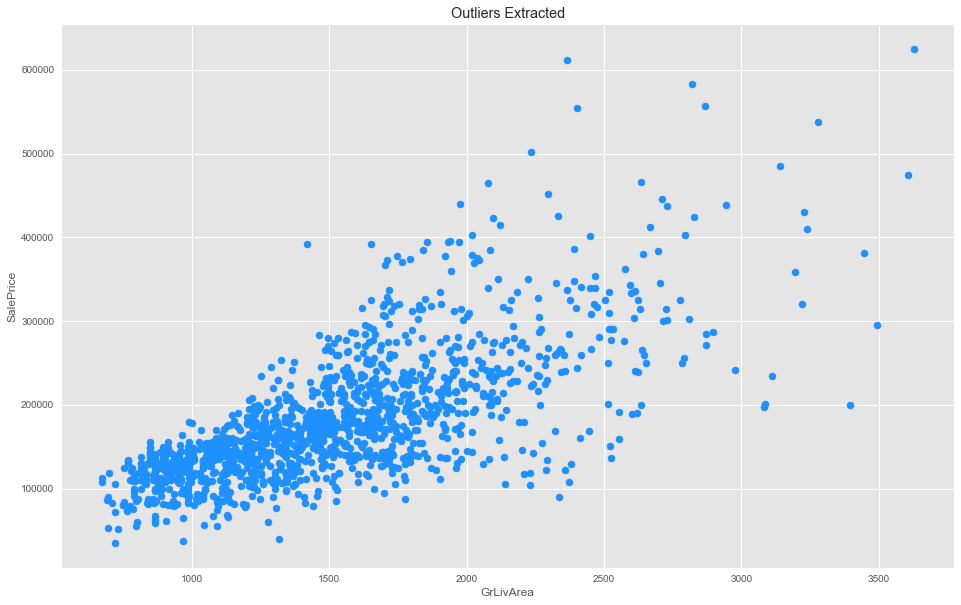

In [69]:
plt.figure(figsize=(16,10))
plt.scatter(df['GrLivArea'], df['SalePrice'], c='dodgerblue')
plt.title('Outliers Extracted')
plt.xlabel("GrLivArea")
plt.ylabel("SalePrice")
plt.show()

##### Log Transform Price
- Return the natural logarithm of one plus the input array, element-wise.

In [70]:
df['SalePrice'] = np.log1p(df['SalePrice'])

In [71]:
y = df['SalePrice']


##### Missing Values

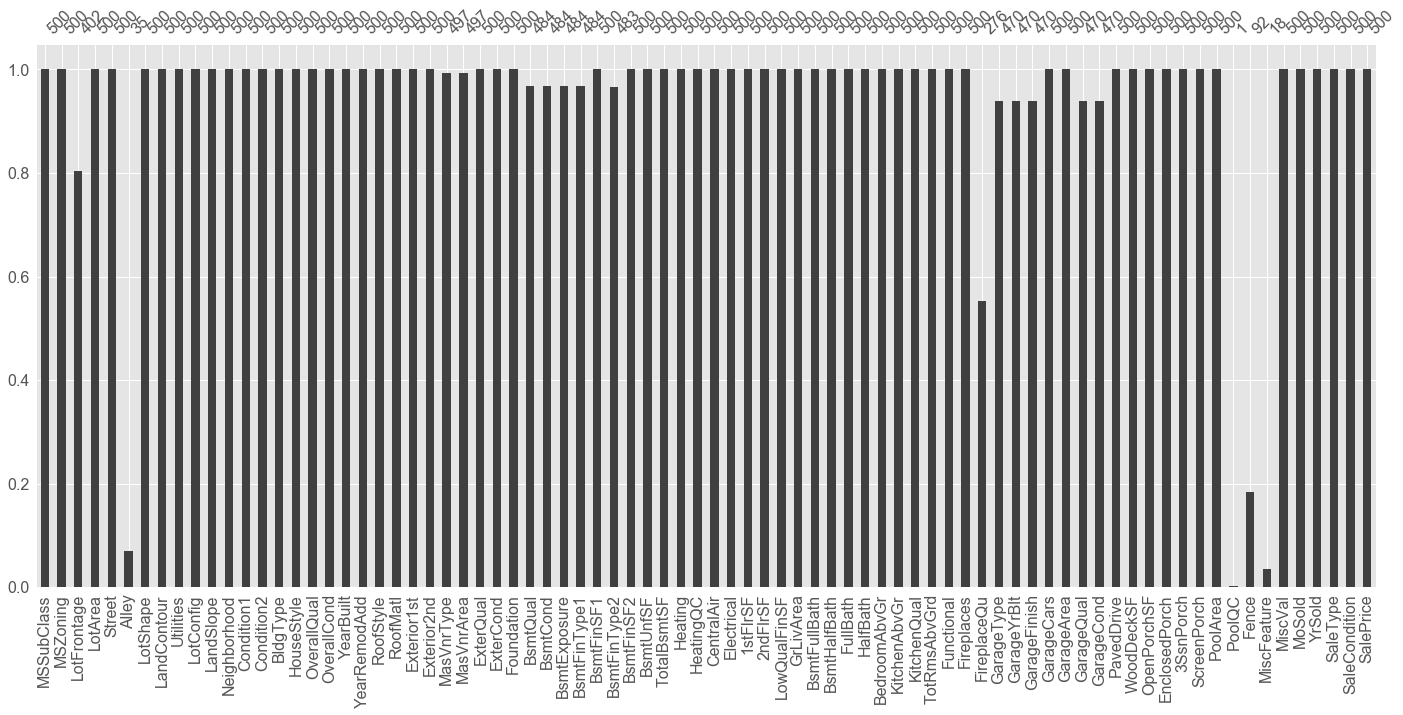

In [72]:
import missingno as msno
msno.bar(df.sample(500))

In [73]:
# Alley : data description says NA means "no alley access"
df.loc[:, "Alley"] = df.loc[:, "Alley"].fillna("None")
# BedroomAbvGr : NA most likely means 0
df.loc[:, "BedroomAbvGr"] = df.loc[:, "BedroomAbvGr"].fillna(0)
# BsmtQual etc : data description says NA for basement features is "no basement"
df.loc[:, "BsmtQual"] = df.loc[:, "BsmtQual"].fillna("No")
df.loc[:, "BsmtCond"] = df.loc[:, "BsmtCond"].fillna("No")
df.loc[:, "BsmtExposure"] = df.loc[:, "BsmtExposure"].fillna("No")
df.loc[:, "BsmtFinType1"] = df.loc[:, "BsmtFinType1"].fillna("No")
df.loc[:, "BsmtFinType2"] = df.loc[:, "BsmtFinType2"].fillna("No")
df.loc[:, "BsmtFullBath"] = df.loc[:, "BsmtFullBath"].fillna(0)
df.loc[:, "BsmtHalfBath"] = df.loc[:, "BsmtHalfBath"].fillna(0)
df.loc[:, "BsmtUnfSF"] = df.loc[:, "BsmtUnfSF"].fillna(0)
# CentralAir : NA most likely means No
df.loc[:, "CentralAir"] = df.loc[:, "CentralAir"].fillna("N")
# Condition : NA most likely means Normal
df.loc[:, "Condition1"] = df.loc[:, "Condition1"].fillna("Norm")
df.loc[:, "Condition2"] = df.loc[:, "Condition2"].fillna("Norm")
# EnclosedPorch : NA most likely means no enclosed porch
df.loc[:, "EnclosedPorch"] = df.loc[:, "EnclosedPorch"].fillna(0)
# External stuff : NA most likely means average
df.loc[:, "ExterCond"] = df.loc[:, "ExterCond"].fillna("TA")
df.loc[:, "ExterQual"] = df.loc[:, "ExterQual"].fillna("TA")
# Fence : data description says NA means "no fence"
df.loc[:, "Fence"] = df.loc[:, "Fence"].fillna("No")
# FireplaceQu : data description says NA means "no fireplace"
df.loc[:, "FireplaceQu"] = df.loc[:, "FireplaceQu"].fillna("No")
df.loc[:, "Fireplaces"] = df.loc[:, "Fireplaces"].fillna(0)
# Functional : data description says NA means typical
df.loc[:, "Functional"] = df.loc[:, "Functional"].fillna("Typ")
# GarageType etc : data description says NA for garage features is "no garage"
df.loc[:, "GarageType"] = df.loc[:, "GarageType"].fillna("No")
df.loc[:, "GarageFinish"] = df.loc[:, "GarageFinish"].fillna("No")
df.loc[:, "GarageQual"] = df.loc[:, "GarageQual"].fillna("No")
df.loc[:, "GarageCond"] = df.loc[:, "GarageCond"].fillna("No")
df.loc[:, "GarageArea"] = df.loc[:, "GarageArea"].fillna(0)
df.loc[:, "GarageCars"] = df.loc[:, "GarageCars"].fillna(0)
# HalfBath : NA most likely means no half baths above grade
df.loc[:, "HalfBath"] = df.loc[:, "HalfBath"].fillna(0)
# HeatingQC : NA most likely means typical
df.loc[:, "HeatingQC"] = df.loc[:, "HeatingQC"].fillna("TA")
# KitchenAbvGr : NA most likely means 0
df.loc[:, "KitchenAbvGr"] = df.loc[:, "KitchenAbvGr"].fillna(0)
# KitchenQual : NA most likely means typical
df.loc[:, "KitchenQual"] = df.loc[:, "KitchenQual"].fillna("TA")
# LotFrontage : NA most likely means no lot frontage
df.loc[:, "LotFrontage"] = df.loc[:, "LotFrontage"].fillna(0)
# LotShape : NA most likely means regular
df.loc[:, "LotShape"] = df.loc[:, "LotShape"].fillna("Reg")
# MasVnrType : NA most likely means no veneer
df.loc[:, "MasVnrType"] = df.loc[:, "MasVnrType"].fillna("None")
df.loc[:, "MasVnrArea"] = df.loc[:, "MasVnrArea"].fillna(0)
# MiscFeature : data description says NA means "no misc feature"
df.loc[:, "MiscFeature"] = df.loc[:, "MiscFeature"].fillna("No")
df.loc[:, "MiscVal"] = df.loc[:, "MiscVal"].fillna(0)
# OpenPorchSF : NA most likely means no open porch
df.loc[:, "OpenPorchSF"] = df.loc[:, "OpenPorchSF"].fillna(0)
# PavedDrive : NA most likely means not paved
df.loc[:, "PavedDrive"] = df.loc[:, "PavedDrive"].fillna("N")
# PoolQC : data description says NA means "no pool"
df.loc[:, "PoolQC"] = df.loc[:, "PoolQC"].fillna("No")
df.loc[:, "PoolArea"] = df.loc[:, "PoolArea"].fillna(0)
# SaleCondition : NA most likely means normal sale
df.loc[:, "SaleCondition"] = df.loc[:, "SaleCondition"].fillna("Normal")
# ScreenPorch : NA most likely means no screen porch
df.loc[:, "ScreenPorch"] = df.loc[:, "ScreenPorch"].fillna(0)
# TotRmsAbvGrd : NA most likely means 0
df.loc[:, "TotRmsAbvGrd"] = df.loc[:, "TotRmsAbvGrd"].fillna(0)
# Utilities : NA most likely means all public utilities
df.loc[:, "Utilities"] = df.loc[:, "Utilities"].fillna("AllPub")
# WoodDeckSF : NA most likely means no wood deck
df.loc[:, "WoodDeckSF"] = df.loc[:, "WoodDeckSF"].fillna(0)

In [74]:
# Some numerical features are actually really categories
df = df.replace({"MSSubClass" : {20 : "SC20", 30 : "SC30", 40 : "SC40", 45 : "SC45", 
                                       50 : "SC50", 60 : "SC60", 70 : "SC70", 75 : "SC75", 
                                       80 : "SC80", 85 : "SC85", 90 : "SC90", 120 : "SC120", 
                                       150 : "SC150", 160 : "SC160", 180 : "SC180", 190 : "SC190"},
                       "MoSold" : {1 : "Jan", 2 : "Feb", 3 : "Mar", 4 : "Apr", 5 : "May", 6 : "Jun",
                                   7 : "Jul", 8 : "Aug", 9 : "Sep", 10 : "Oct", 11 : "Nov", 12 : "Dec"}
                      })

In [75]:
# Encode some categorical features as ordered numbers when there is information in the order
df = df.replace({"Alley" : {"Grvl" : 1, "Pave" : 2},
                       "BsmtCond" : {"No" : 0, "Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5},
                       "BsmtExposure" : {"No" : 0, "Mn" : 1, "Av": 2, "Gd" : 3},
                       "BsmtFinType1" : {"No" : 0, "Unf" : 1, "LwQ": 2, "Rec" : 3, "BLQ" : 4, 
                                         "ALQ" : 5, "GLQ" : 6},
                       "BsmtFinType2" : {"No" : 0, "Unf" : 1, "LwQ": 2, "Rec" : 3, "BLQ" : 4, 
                                         "ALQ" : 5, "GLQ" : 6},
                       "BsmtQual" : {"No" : 0, "Po" : 1, "Fa" : 2, "TA": 3, "Gd" : 4, "Ex" : 5},
                       "ExterCond" : {"Po" : 1, "Fa" : 2, "TA": 3, "Gd": 4, "Ex" : 5},
                       "ExterQual" : {"Po" : 1, "Fa" : 2, "TA": 3, "Gd": 4, "Ex" : 5},
                       "FireplaceQu" : {"No" : 0, "Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5},
                       "Functional" : {"Sal" : 1, "Sev" : 2, "Maj2" : 3, "Maj1" : 4, "Mod": 5, 
                                       "Min2" : 6, "Min1" : 7, "Typ" : 8},
                       "GarageCond" : {"No" : 0, "Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5},
                       "GarageQual" : {"No" : 0, "Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5},
                       "HeatingQC" : {"Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5},
                       "KitchenQual" : {"Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5},
                       "LandSlope" : {"Sev" : 1, "Mod" : 2, "Gtl" : 3},
                       "LotShape" : {"IR3" : 1, "IR2" : 2, "IR1" : 3, "Reg" : 4},
                       "PavedDrive" : {"N" : 0, "P" : 1, "Y" : 2},
                       "PoolQC" : {"No" : 0, "Fa" : 1, "TA" : 2, "Gd" : 3, "Ex" : 4},
                       "Street" : {"Grvl" : 1, "Pave" : 2},
                       "Utilities" : {"ELO" : 1, "NoSeWa" : 2, "NoSewr" : 3, "AllPub" : 4}}
                     )

In [76]:
# Create new features
# 1* Simplifications of existing features
df["SimplOverallQual"] = df.OverallQual.replace({1 : 1, 2 : 1, 3 : 1, # bad
                                                       4 : 2, 5 : 2, 6 : 2, # average
                                                       7 : 3, 8 : 3, 9 : 3, 10 : 3 # good
                                                      })
df["SimplOverallCond"] = df.OverallCond.replace({1 : 1, 2 : 1, 3 : 1, # bad
                                                       4 : 2, 5 : 2, 6 : 2, # average
                                                       7 : 3, 8 : 3, 9 : 3, 10 : 3 # good
                                                      })
df["SimplPoolQC"] = df.PoolQC.replace({1 : 1, 2 : 1, # average
                                             3 : 2, 4 : 2 # good
                                            })
df["SimplGarageCond"] = df.GarageCond.replace({1 : 1, # bad
                                                     2 : 1, 3 : 1, # average
                                                     4 : 2, 5 : 2 # good
                                                    })
df["SimplGarageQual"] = df.GarageQual.replace({1 : 1, # bad
                                                     2 : 1, 3 : 1, # average
                                                     4 : 2, 5 : 2 # good
                                                    })
df["SimplFireplaceQu"] = df.FireplaceQu.replace({1 : 1, # bad
                                                       2 : 1, 3 : 1, # average
                                                       4 : 2, 5 : 2 # good
                                                      })
df["SimplFireplaceQu"] = df.FireplaceQu.replace({1 : 1, # bad
                                                       2 : 1, 3 : 1, # average
                                                       4 : 2, 5 : 2 # good
                                                      })
df["SimplFunctional"] = df.Functional.replace({1 : 1, 2 : 1, # bad
                                                     3 : 2, 4 : 2, # major
                                                     5 : 3, 6 : 3, 7 : 3, # minor
                                                     8 : 4 # typical
                                                    })
df["SimplKitchenQual"] = df.KitchenQual.replace({1 : 1, # bad
                                                       2 : 1, 3 : 1, # average
                                                       4 : 2, 5 : 2 # good
                                                      })
df["SimplHeatingQC"] = df.HeatingQC.replace({1 : 1, # bad
                                                   2 : 1, 3 : 1, # average
                                                   4 : 2, 5 : 2 # good
                                                  })
df["SimplBsmtFinType1"] = df.BsmtFinType1.replace({1 : 1, # unfinished
                                                         2 : 1, 3 : 1, # rec room
                                                         4 : 2, 5 : 2, 6 : 2 # living quarters
                                                        })
df["SimplBsmtFinType2"] = df.BsmtFinType2.replace({1 : 1, # unfinished
                                                         2 : 1, 3 : 1, # rec room
                                                         4 : 2, 5 : 2, 6 : 2 # living quarters
                                                        })
df["SimplBsmtCond"] = df.BsmtCond.replace({1 : 1, # bad
                                                 2 : 1, 3 : 1, # average
                                                 4 : 2, 5 : 2 # good
                                                })
df["SimplBsmtQual"] = df.BsmtQual.replace({1 : 1, # bad
                                                 2 : 1, 3 : 1, # average
                                                 4 : 2, 5 : 2 # good
                                                })
df["SimplExterCond"] = df.ExterCond.replace({1 : 1, # bad
                                                   2 : 1, 3 : 1, # average
                                                   4 : 2, 5 : 2 # good
                                                  })
df["SimplExterQual"] = df.ExterQual.replace({1 : 1, # bad
                                                   2 : 1, 3 : 1, # average
                                                   4 : 2, 5 : 2 # good
                                                  })


In [77]:
# Find most important features relative to target
print("Find most important features relative to target")
corr = df.corr()
corr.sort_values(["SalePrice"], ascending = False, inplace = True)
print(corr.SalePrice)

Find most important features relative to target
SalePrice            1.000
OverallQual          0.813
GrLivArea            0.710
SimplOverallQual     0.704
ExterQual            0.682
GarageCars           0.675
KitchenQual          0.670
GarageArea           0.649
SimplExterQual       0.638
TotalBsmtSF          0.635
BsmtQual             0.623
SimplKitchenQual     0.614
SimplBsmtQual        0.603
1stFlrSF             0.603
YearBuilt            0.591
FullBath             0.584
YearRemodAdd         0.567
FireplaceQu          0.543
GarageYrBlt          0.541
TotRmsAbvGrd         0.518
SimplFireplaceQu     0.511
Fireplaces           0.482
HeatingQC            0.473
MasVnrArea           0.426
SimplHeatingQC       0.398
BsmtFinSF1           0.384
GarageQual           0.352
BsmtExposure         0.352
GarageCond           0.347
BsmtFinType1         0.340
                     ...  
LotArea              0.255
BsmtFullBath         0.252
BsmtUnfSF            0.212
SimplBsmtCond        0.199
Bedroom

In [78]:
# Differentiate numerical features (minus the target) and categorical features
categorical_features = df.select_dtypes(include = ["object"]).columns
numerical_features = df.select_dtypes(exclude = ["object"]).columns
numerical_features = numerical_features.drop("SalePrice")
print("Numerical features : " + str(len(numerical_features)))
print("Categorical features : " + str(len(categorical_features)))
df_num = df[numerical_features]
df_cat = df[categorical_features]

Numerical features : 68
Categorical features : 26


In [79]:
# Handle remaining missing values for numerical features by using median as replacement
print(f"NAs for numerical features in df : {df_num.isnull().values.sum()}")
df_num = df_num.fillna(df_num.median())
print(f"Remaining NAs for numerical features in df :{df_num.isnull().values.sum()}")

NAs for numerical features in df : 75
Remaining NAs for numerical features in df :0


In [80]:
# Log transform of the skewed numerical features to lessen impact of outliers
# Inspired by Alexandru Papiu's script : https://www.kaggle.com/apapiu/house-prices-advanced-regression-techniques/regularized-linear-models
# As a general rule of thumb, a skewness with an absolute value > 0.5 is considered at least moderately skewed
skewness = df_num.apply(lambda x: skew(x))
skewness = skewness[abs(skewness) > 0.5]
print(str(skewness.shape[0]) + " skewed numerical features to log transform")
skewed_features = skewness.index
df_num[skewed_features] = np.log1p(df_num[skewed_features])

53 skewed numerical features to log transform


##### Exclude Categorical Variables

In [81]:

# Partition the dataset in df + validation sets
X_train, X_test, y_train, y_test = train_test_split(df_num, y, test_size = 0.3, random_state = 0)

In [82]:
print("X_train : " + str(X_train.shape))
print("X_test : " + str(X_test.shape))
print("y_train : " + str(y_train.shape))
print("y_test : " + str(y_test.shape))

X_train : (1010, 68)
X_test : (434, 68)
y_train : (1010,)
y_test : (434,)


In [83]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [84]:
import keras 
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.optimizers import SGD
from keras.preprocessing import text
from keras.preprocessing import text
model = Sequential()

In [85]:
# In this case, the number of variables in the inner layer is 11
# And the number of variable in the outer layer is 1
# 11 + 1 / 2 = 6 --> units = 6
# The Add function adds the hidden layer 
model.add(Dense(units = 50, kernel_initializer='normal', activation ='relu', input_dim =68))
model.add(Dense(units = 30, kernel_initializer='normal', activation ='relu'))
model.add(Dense(units = 15, kernel_initializer='normal', activation ='relu'))
model.add(Dense(units = 1, kernel_initializer='normal'))

model.compile(optimizer='adam', loss = 'mse', metrics =['mse'])
model.fit(X_train, y_train, epochs = 300, verbose=1)
score = model.evaluate(X_train, y_train, verbose=0)

Epoch 1/300
1010/1010 [==============================] - 0s - loss: 142.2653 - mean_squared_error: 142.2653     
Epoch 2/300
1010/1010 [==============================] - 0s - loss: 101.1332 - mean_squared_error: 101.1332     
Epoch 3/300
1010/1010 [==============================] - 0s - loss: 19.1793 - mean_squared_error: 19.1793     
Epoch 4/300
1010/1010 [==============================] - 0s - loss: 7.4683 - mean_squared_error: 7.4683     
Epoch 5/300
1010/1010 [==============================] - 0s - loss: 3.8111 - mean_squared_error: 3.8111     
Epoch 6/300
1010/1010 [==============================] - 0s - loss: 2.3419 - mean_squared_error: 2.3419     
Epoch 7/300
1010/1010 [==============================] - 0s - loss: 1.7181 - mean_squared_error: 1.7181     
Epoch 8/300
1010/1010 [==============================] - 0s - loss: 1.3600 - mean_squared_error: 1.3600     
Epoch 9/300
1010/1010 [==============================] - 0s - loss: 1.1050 - mean_squared_error: 1.1050     
Epoch 10/

In [86]:
print(score)

[0.0028383921771909636, 0.0028383921771909636]


##### RMSE

In [87]:
rmse = np.sqrt(score)
rmse

array([ 0.05327656,  0.05327656])

In [88]:

y_train_las = model.predict(X_train)
y_test_las = model.predict(X_test)

In [89]:
X = np.array(y_train_las)
X_ytrain_las = X.reshape((1010))
X_ytrain_las.shape

(1010,)

In [90]:
xx = np.array(y_test_las)
xx.shape
xx_ytest = xx.reshape((434))

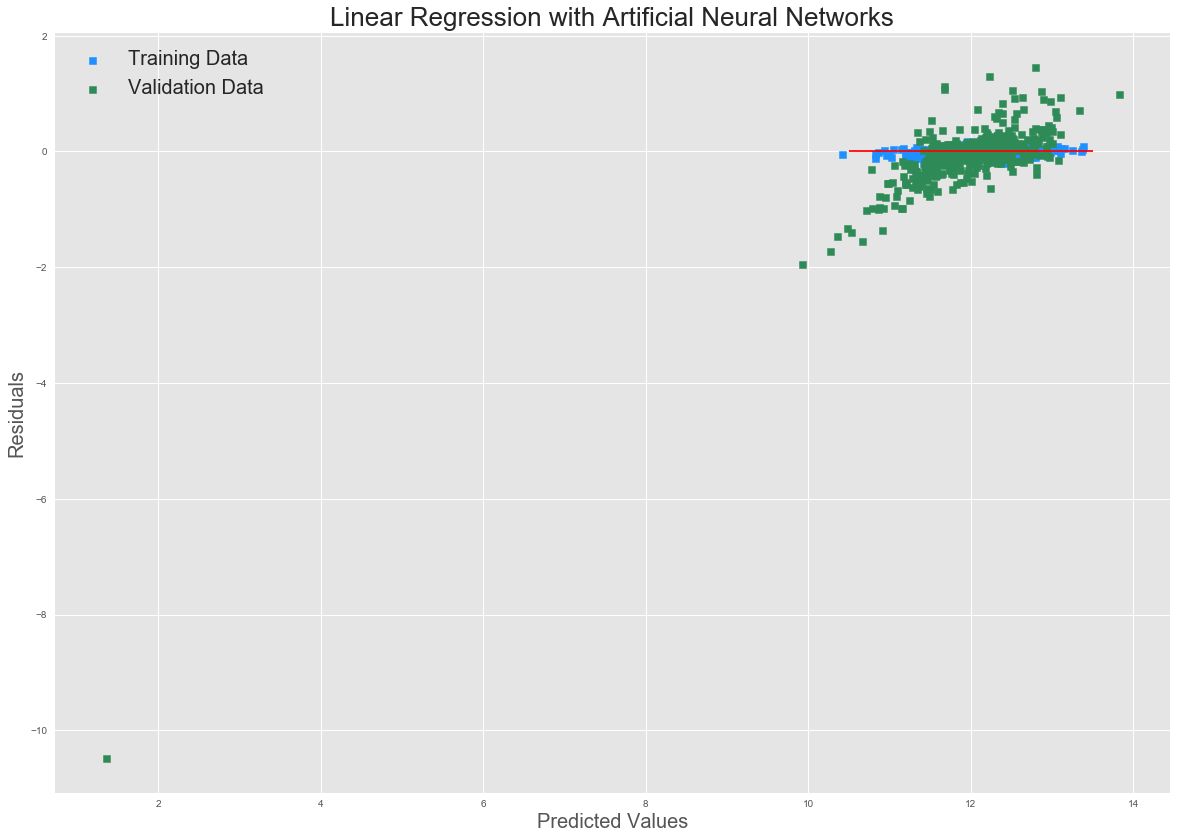

In [91]:
# Plot residuals
plt.figure(figsize=(20,14))
plt.scatter(X_ytrain_las, X_ytrain_las - y_train, c = "dodgerblue", marker = "s", label = "Training Data")
plt.scatter(xx_ytest, xx_ytest - y_test, c = "seagreen", marker = "s", label = "Validation Data")
plt.title("Linear Regression with Artificial Neural Networks", fontsize=26)
plt.xlabel("Predicted Values", fontsize=20)
plt.ylabel("Residuals", fontsize=20)
plt.legend(loc = "upper left", fontsize=20)
plt.hlines(y = 0, xmin = 10.5, xmax = 13.5, color = "red")
plt.show()


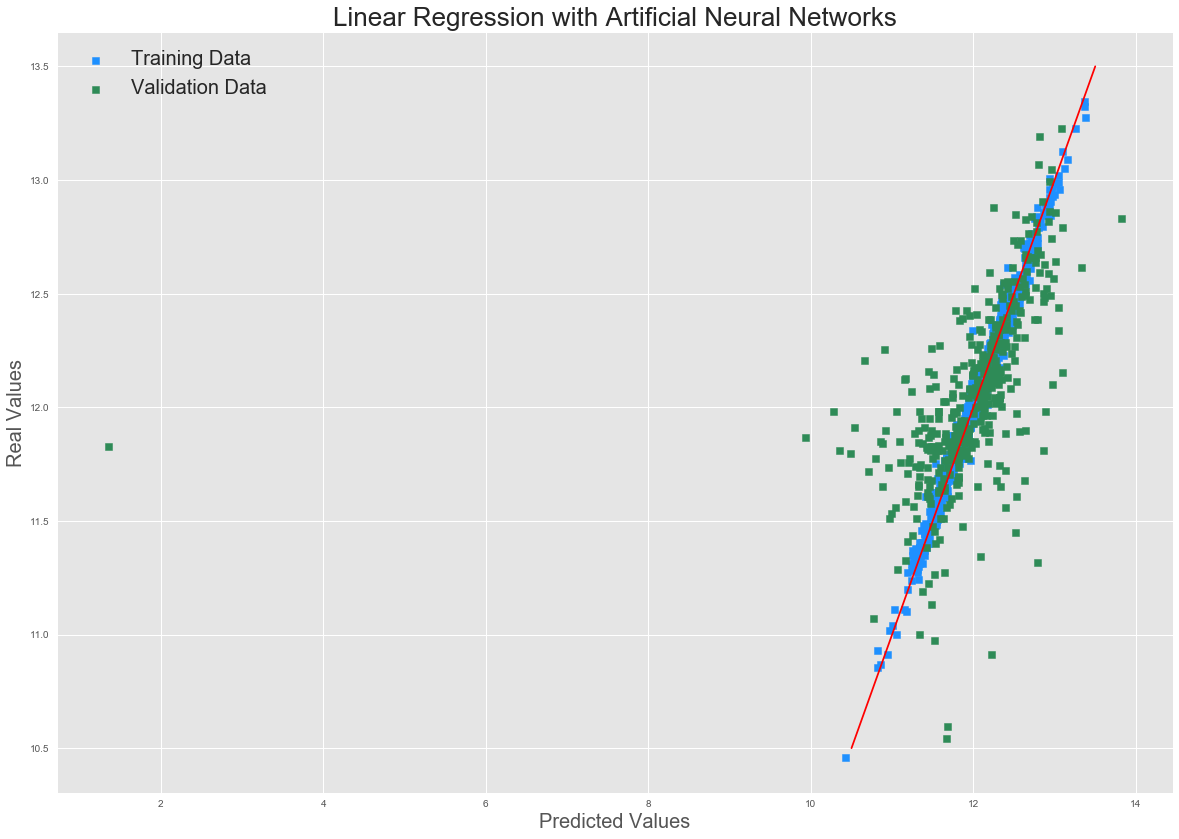

In [92]:
# Plot predictions



plt.figure(figsize=(20,14))
plt.scatter(X_ytrain_las, y_train, c = "dodgerblue", marker = "s", label = "Training Data")
plt.scatter(xx_ytest, y_test, c = "seagreen", marker = "s", label = "Validation Data")
plt.title("Linear Regression with Artificial Neural Networks", fontsize=26)
plt.xlabel("Predicted Values", fontsize=20)
plt.ylabel("Real Values", fontsize=20)
plt.legend(loc = "upper left", fontsize=20)
plt.plot([10.5, 13.5], [10.5, 13.5], c = "red")
plt.show()


